# FITC Preconditioner

## Packages

In [1]:
import torch
import gpytorch
import matplotlib.pyplot as plt
from matplotlib import colors
import numpy as np
import os
import gpboost as gpb
import requests
import pandas as pd
import time

## Function to generate data

In [2]:
# Download notebook from GitHub
url = 'https://raw.githubusercontent.com/TimGyger/FSVA/refs/heads/main/Simulation/Simulate_Data.py'

# Download the Python file
response = requests.get(url)

# Save the Python file locally
with open('your_script.py', 'wb') as f:
    f.write(response.content)

print("Python file downloaded successfully!")

# Execute the downloaded Python file using exec()
with open('your_script.py', 'r') as f:
    code = f.read()

exec(code)

Python file downloaded successfully!


## Non-Gaussian Data

In [3]:
#X, y, b = simulate_gp_response("bernoulli-logit",100000, 0, 1.0, torch.tensor([(0.25, 0.50,0.75,1.00,1.25)]),1)

In [4]:
# Convert X and y to a DataFrame
# data = pd.DataFrame(X.numpy(), columns=[f"x{i+1}" for i in range(X.shape[1])])
# data['y'] = y.numpy()
# data['b'] = b.numpy()

# Save to CSV
# data.to_csv("simulated_data_non_Gaussian.csv", index=False)
# print("Data saved to 'simulated_data_non_Gaussian.csv'")

In [2]:
# URL of the raw CSV file on GitHub
url = 'https://raw.githubusercontent.com/TimGyger/FSVA/refs/heads/main/Simulation/simulated_data_non_Gaussian.csv'

# Load the CSV file directly from the URL
df = pd.read_csv(url)

# Select the first 5 columns for X
X = df.iloc[:, :5]  # First 5 columns

# Select the last column for y
y = df.iloc[:, 5]  # Last column

In [3]:
# Convert to numpy:
X_np = X.to_numpy()
y_np = y.to_numpy()

## Experiments

### m = 200 \& m_v = 30

In [10]:
# Different number of inducing points for FITC preconditioner
vector_ind_points = [10, 20, 50, 100, 200, 300, 400, 500, 1000]
# Number of repetitions
num_rep = 100
# Zero matrices
matrix = np.zeros((len(vector_ind_points), num_rep))
matrix_t = np.zeros((len(vector_ind_points), num_rep))
# Nested loop to iterate over both vectors
for i, val1 in enumerate(vector_ind_points):
    for j in range(0, num_rep):
        # Start the timer
        start_time = time.time()
        # FSVecchia with euclidean-based neighbor search
        model_fsva = gpb.GPModel(gp_coords=X_np, cov_function="gaussian_ard", 
                                 likelihood="bernoulli_logit",num_neighbors = 30,num_ind_points = 200,ind_points_selection = "kmeans++",
                                 matrix_inversion_method = "iterative", gp_approx="vecchia",seed = 2)
        model_fsva.set_optim_params(params={"cg_preconditioner_type": "predictive_process_plus_diagonal",
                                            "piv_chol_rank": val1, "seed_rand_vec_trace": j+1,
                                            "num_rand_vec_trace": 100, "cg_delta_conv": 0.0001})
        neg_fsva = model_fsva.neg_log_likelihood(cov_pars = np.array([1.0, 0.25, 0.50,0.75,1.00,1.25]), y = y_np)
        matrix[i, j] = neg_fsva
        # End the timer
        end_time = time.time()

        # Calculate elapsed time in seconds
        matrix_t[i, j] = end_time - start_time
        

[GPBoost] [Info] Starting kmeans++ algorithm for determining inducing points 
[GPBoost] [Info] Inducing points have been determined 
[GPBoost] [Info] Starting kmeans++ algorithm for determining inducing points 
[GPBoost] [Info] Inducing points have been determined 
[GPBoost] [Info] FindModePostRandEffCalcMLLFSAVecchia: finished after 3 iterations 
[GPBoost] [Info] Starting kmeans++ algorithm for determining inducing points 
[GPBoost] [Info] Inducing points have been determined 
[GPBoost] [Info] Starting kmeans++ algorithm for determining inducing points 
[GPBoost] [Info] Inducing points have been determined 
[GPBoost] [Info] FindModePostRandEffCalcMLLFSAVecchia: finished after 3 iterations 
[GPBoost] [Info] Starting kmeans++ algorithm for determining inducing points 
[GPBoost] [Info] Inducing points have been determined 
[GPBoost] [Info] Starting kmeans++ algorithm for determining inducing points 
[GPBoost] [Info] Inducing points have been determined 
[GPBoost] [Info] FindModePostRandE

### Plot

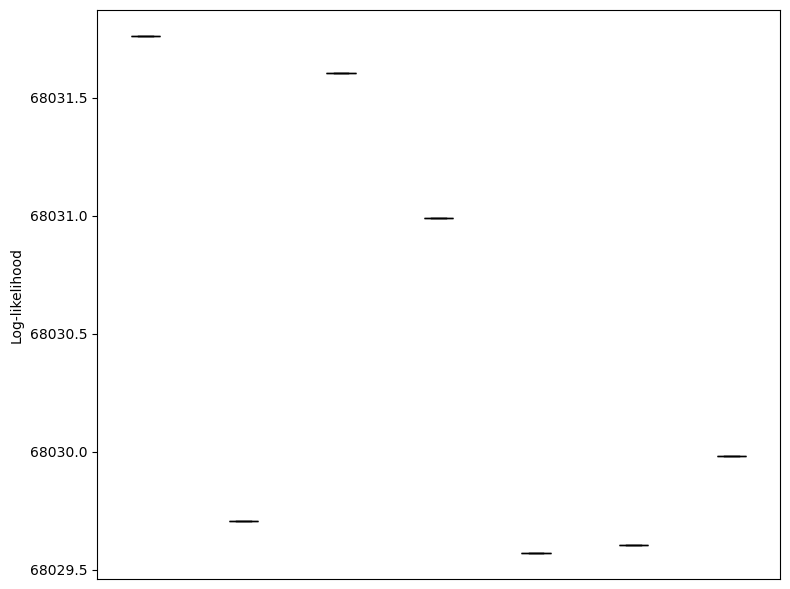

C:\Users\JumpStart\AppData\Local\Temp\ipykernel_30264\1443740740.py:20: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title="")


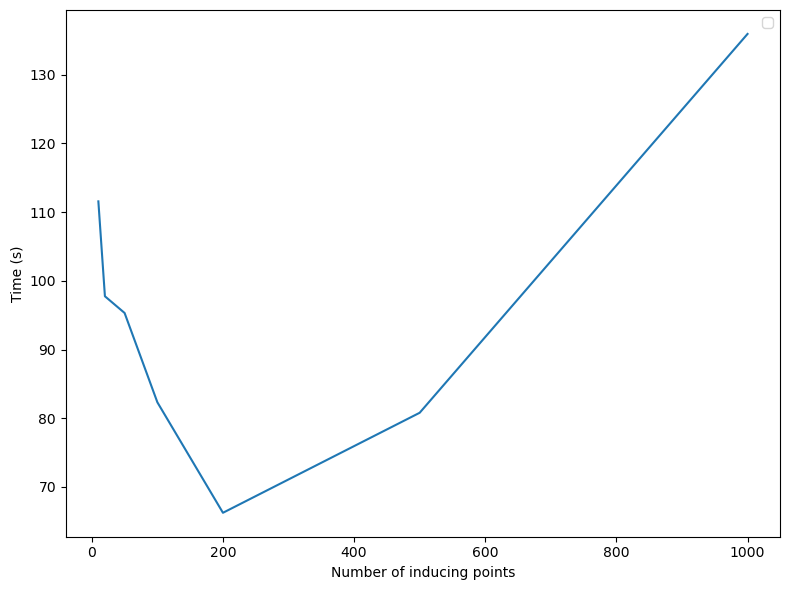

In [27]:
# P1: Log-likelihood Box Plot
plt.figure(figsize=(8, 6))

# Group the data by 't' and plot box plots
plt.boxplot(matrix.transpose(), widths=0.3, patch_artist=True,
            medianprops=dict(color='black'))
plt.ylabel("Log-likelihood")
plt.xticks([])
plt.xlabel("")
plt.tight_layout()
plt.show()

# P2: Time Plot
plt.figure(figsize=(8, 6))

row_means = np.mean(matrix_t, axis=1)
plt.plot(vector_ind_points, row_means, linewidth=1.5)
plt.ylabel("Time (s)")
plt.xlabel("Number of inducing points")
plt.legend(title="")
plt.tight_layout()
plt.show()

### m = 50 \& m_v = 50

In [28]:
# Different number of inducing points for FITC preconditioner
vector_ind_points = [10, 20, 50, 100, 200, 300, 400, 500, 1000]
# Number of repetitions
num_rep = 100
# Zero matrices
matrix = np.zeros((len(vector_ind_points), num_rep))
matrix_t = np.zeros((len(vector_ind_points), num_rep))
# Nested loop to iterate over both vectors
for i, val1 in enumerate(vector_ind_points):
    for j in range(0, num_rep):
        # Start the timer
        start_time = time.time()
        # FSVecchia with euclidean-based neighbor search
        model_fsva = gpb.GPModel(gp_coords=X_np, cov_function="gaussian_ard", 
                                 likelihood="bernoulli_logit",num_neighbors = 50,num_ind_points = 50,ind_points_selection = "kmeans++",
                                 matrix_inversion_method = "iterative", gp_approx="vecchia",seed = 2)
        model_fsva.set_optim_params(params={"cg_preconditioner_type": "predictive_process_plus_diagonal",
                                            "piv_chol_rank": val1, "seed_rand_vec_trace": j+1,
                                            "num_rand_vec_trace": 100, "cg_delta_conv": 0.0001})
        neg_fsva = model_fsva.neg_log_likelihood(cov_pars = np.array([1.0, 0.25, 0.50,0.75,1.00,1.25]), y = y_np)
        matrix[i, j] = neg_fsva
        # End the timer
        end_time = time.time()

        # Calculate elapsed time in seconds
        matrix_t[i, j] = end_time - start_time
        

[GPBoost] [Info] Starting kmeans++ algorithm for determining inducing points 
[GPBoost] [Info] Inducing points have been determined 
[GPBoost] [Info] Starting kmeans++ algorithm for determining inducing points 
[GPBoost] [Info] Inducing points have been determined 
[GPBoost] [Info] FindModePostRandEffCalcMLLFSAVecchia: finished after 3 iterations 
[GPBoost] [Info] Starting kmeans++ algorithm for determining inducing points 
[GPBoost] [Info] Inducing points have been determined 
[GPBoost] [Info] Starting kmeans++ algorithm for determining inducing points 
[GPBoost] [Info] Inducing points have been determined 
[GPBoost] [Info] FindModePostRandEffCalcMLLFSAVecchia: finished after 3 iterations 
[GPBoost] [Info] Starting kmeans++ algorithm for determining inducing points 
[GPBoost] [Info] Inducing points have been determined 
[GPBoost] [Info] Starting kmeans++ algorithm for determining inducing points 
[GPBoost] [Info] Inducing points have been determined 
[GPBoost] [Info] FindModePostRandE

### Plot

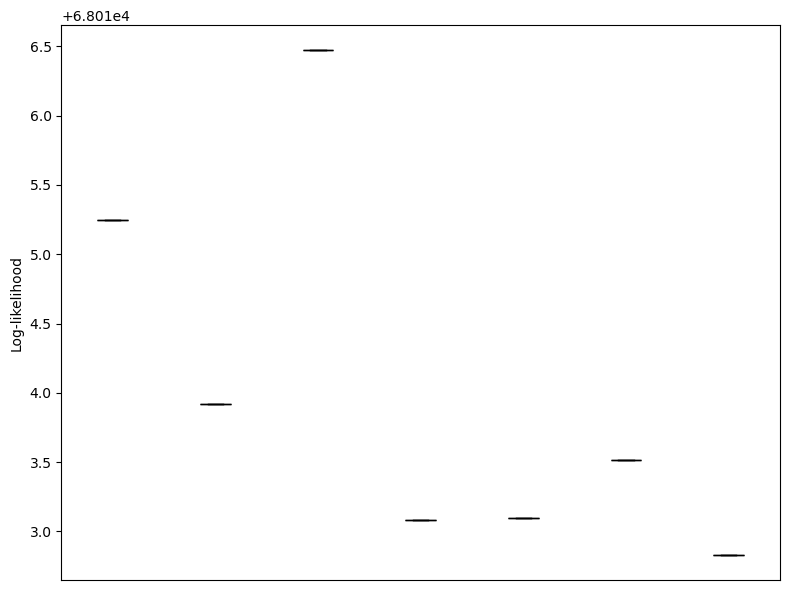

C:\Users\JumpStart\AppData\Local\Temp\ipykernel_30264\1443740740.py:20: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title="")


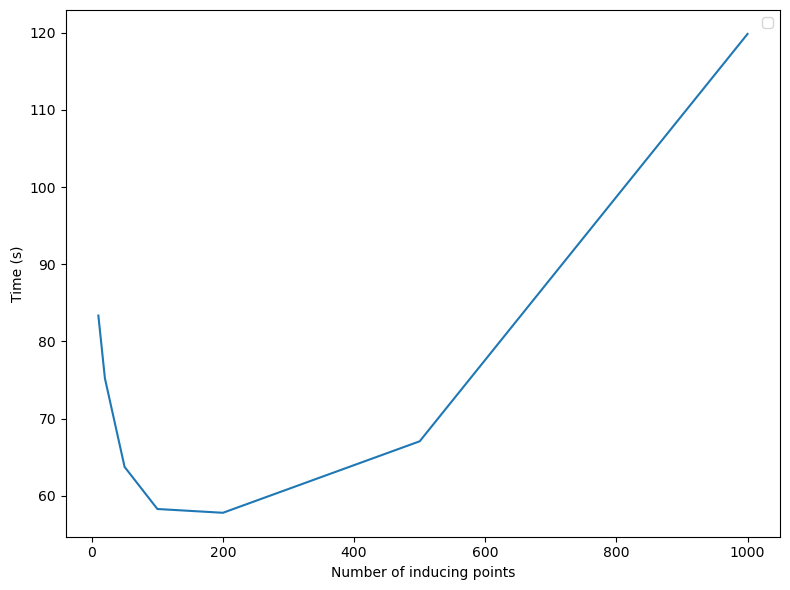

In [29]:
# P1: Log-likelihood Box Plot
plt.figure(figsize=(8, 6))

# Group the data by 't' and plot box plots
plt.boxplot(matrix.transpose(), widths=0.3, patch_artist=True,
            medianprops=dict(color='black'))
plt.ylabel("Log-likelihood")
plt.xticks([])
plt.xlabel("")
plt.tight_layout()
plt.show()

# P2: Time Plot
plt.figure(figsize=(8, 6))

row_means = np.mean(matrix_t, axis=1)
plt.plot(vector_ind_points, row_means, linewidth=1.5)
plt.ylabel("Time (s)")
plt.xlabel("Number of inducing points")
plt.legend(title="")
plt.tight_layout()
plt.show()

### m = 500 \& m_v = 10

In [4]:
# Different number of inducing points for FITC preconditioner
vector_ind_points = [10, 20, 50, 100, 200, 300, 400, 500, 1000]
# Number of repetitions
num_rep = 100
# Zero matrices
matrix = np.zeros((len(vector_ind_points), num_rep))
matrix_t = np.zeros((len(vector_ind_points), num_rep))
# Nested loop to iterate over both vectors
for i, val1 in enumerate(vector_ind_points):
    for j in range(0, num_rep):
        # Start the timer
        start_time = time.time()
        # FSVecchia with euclidean-based neighbor search
        model_fsva = gpb.GPModel(gp_coords=X_np, cov_function="gaussian_ard", 
                                 likelihood="bernoulli_logit",num_neighbors = 10,num_ind_points = 500,ind_points_selection = "kmeans++",
                                 matrix_inversion_method = "iterative", gp_approx="vecchia",seed = 2)
        model_fsva.set_optim_params(params={"cg_preconditioner_type": "predictive_process_plus_diagonal",
                                            "piv_chol_rank": val1, "seed_rand_vec_trace": j+1,
                                            "num_rand_vec_trace": 100, "cg_delta_conv": 0.0001})
        neg_fsva = model_fsva.neg_log_likelihood(cov_pars = np.array([1.0, 0.25, 0.50,0.75,1.00,1.25]), y = y_np)
        matrix[i, j] = neg_fsva
        # End the timer
        end_time = time.time()

        # Calculate elapsed time in seconds
        matrix_t[i, j] = end_time - start_time
        

[GPBoost] [Info] Starting kmeans++ algorithm for determining inducing points 
[GPBoost] [Info] Inducing points have been determined 
[GPBoost] [Info] Starting kmeans++ algorithm for determining inducing points 
[GPBoost] [Info] Inducing points have been determined 
[GPBoost] [Info] FindModePostRandEffCalcMLLFSAVecchia: finished after 3 iterations 
[GPBoost] [Info] Starting kmeans++ algorithm for determining inducing points 
[GPBoost] [Info] Inducing points have been determined 
[GPBoost] [Info] Starting kmeans++ algorithm for determining inducing points 
[GPBoost] [Info] Inducing points have been determined 
[GPBoost] [Info] FindModePostRandEffCalcMLLFSAVecchia: finished after 3 iterations 
[GPBoost] [Info] Starting kmeans++ algorithm for determining inducing points 
[GPBoost] [Info] Inducing points have been determined 
[GPBoost] [Info] Starting kmeans++ algorithm for determining inducing points 
[GPBoost] [Info] Inducing points have been determined 
[GPBoost] [Info] FindModePostRandE

### Plot

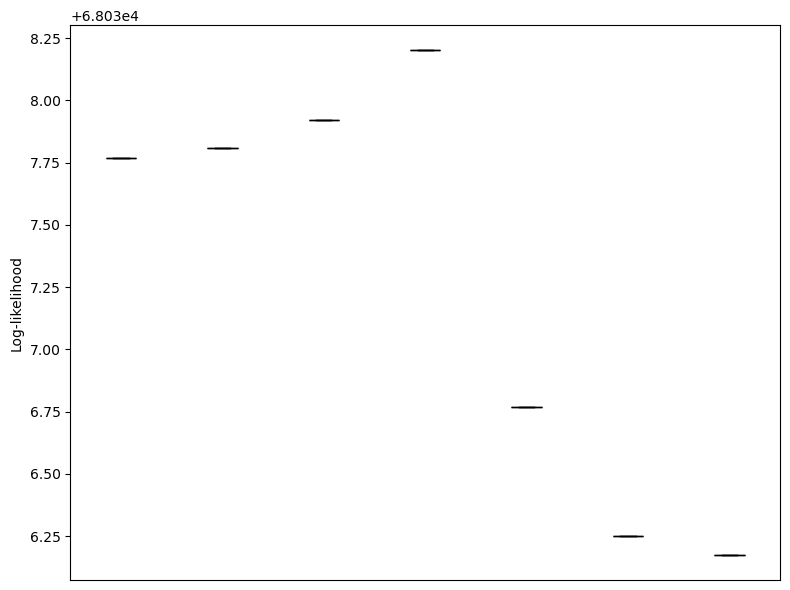

C:\Users\JumpStart\AppData\Local\Temp\ipykernel_18072\1443740740.py:20: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title="")


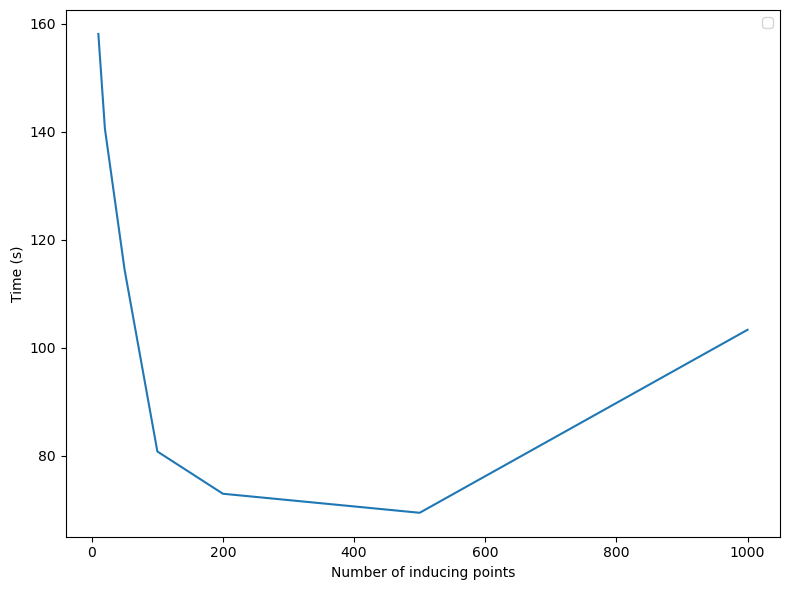

In [5]:
# P1: Log-likelihood Box Plot
plt.figure(figsize=(8, 6))

# Group the data by 't' and plot box plots
plt.boxplot(matrix.transpose(), widths=0.3, patch_artist=True,
            medianprops=dict(color='black'))
plt.ylabel("Log-likelihood")
plt.xticks([])
plt.xlabel("")
plt.tight_layout()
plt.show()

# P2: Time Plot
plt.figure(figsize=(8, 6))

row_means = np.mean(matrix_t, axis=1)
plt.plot(vector_ind_points, row_means, linewidth=1.5)
plt.ylabel("Time (s)")
plt.xlabel("Number of inducing points")
plt.legend(title="")
plt.tight_layout()
plt.show()